In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [172]:
df = pd.read_csv('data/RocketLaunchDataCompleted.csv', encoding='cp949')
df.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

#### 결측치 확인

In [174]:
df.isnull().mean().sort_values(ascending=False)

Hist Ave Sea Level Pressure     1.000000
Hist Ave Visibility             1.000000
Hist Ave Max Wind Speed         1.000000
Notes                           0.990000
Temp at Launch Time             0.803333
Wind Speed at Launch Time       0.803333
Time (East Coast)               0.803333
Launched?                       0.800000
Crewed or Uncrewed              0.800000
Name                            0.800000
Condition                       0.006667
Day Length                      0.006667
Visibility                      0.003333
Ave Temp                        0.003333
Low Temp                        0.003333
Max Wind Speed                  0.003333
High Temp                       0.003333
Hist High Temp                  0.003333
Percipitation at Launch Time    0.003333
Hist Ave Temp                   0.003333
Wind Direction                  0.003333
Hist Ave Percipitation          0.003333
Hist Low Temp                   0.003333
Sea Level Pressure              0.003333
Location        

In [175]:
# !pip install missingno

<Axes: >

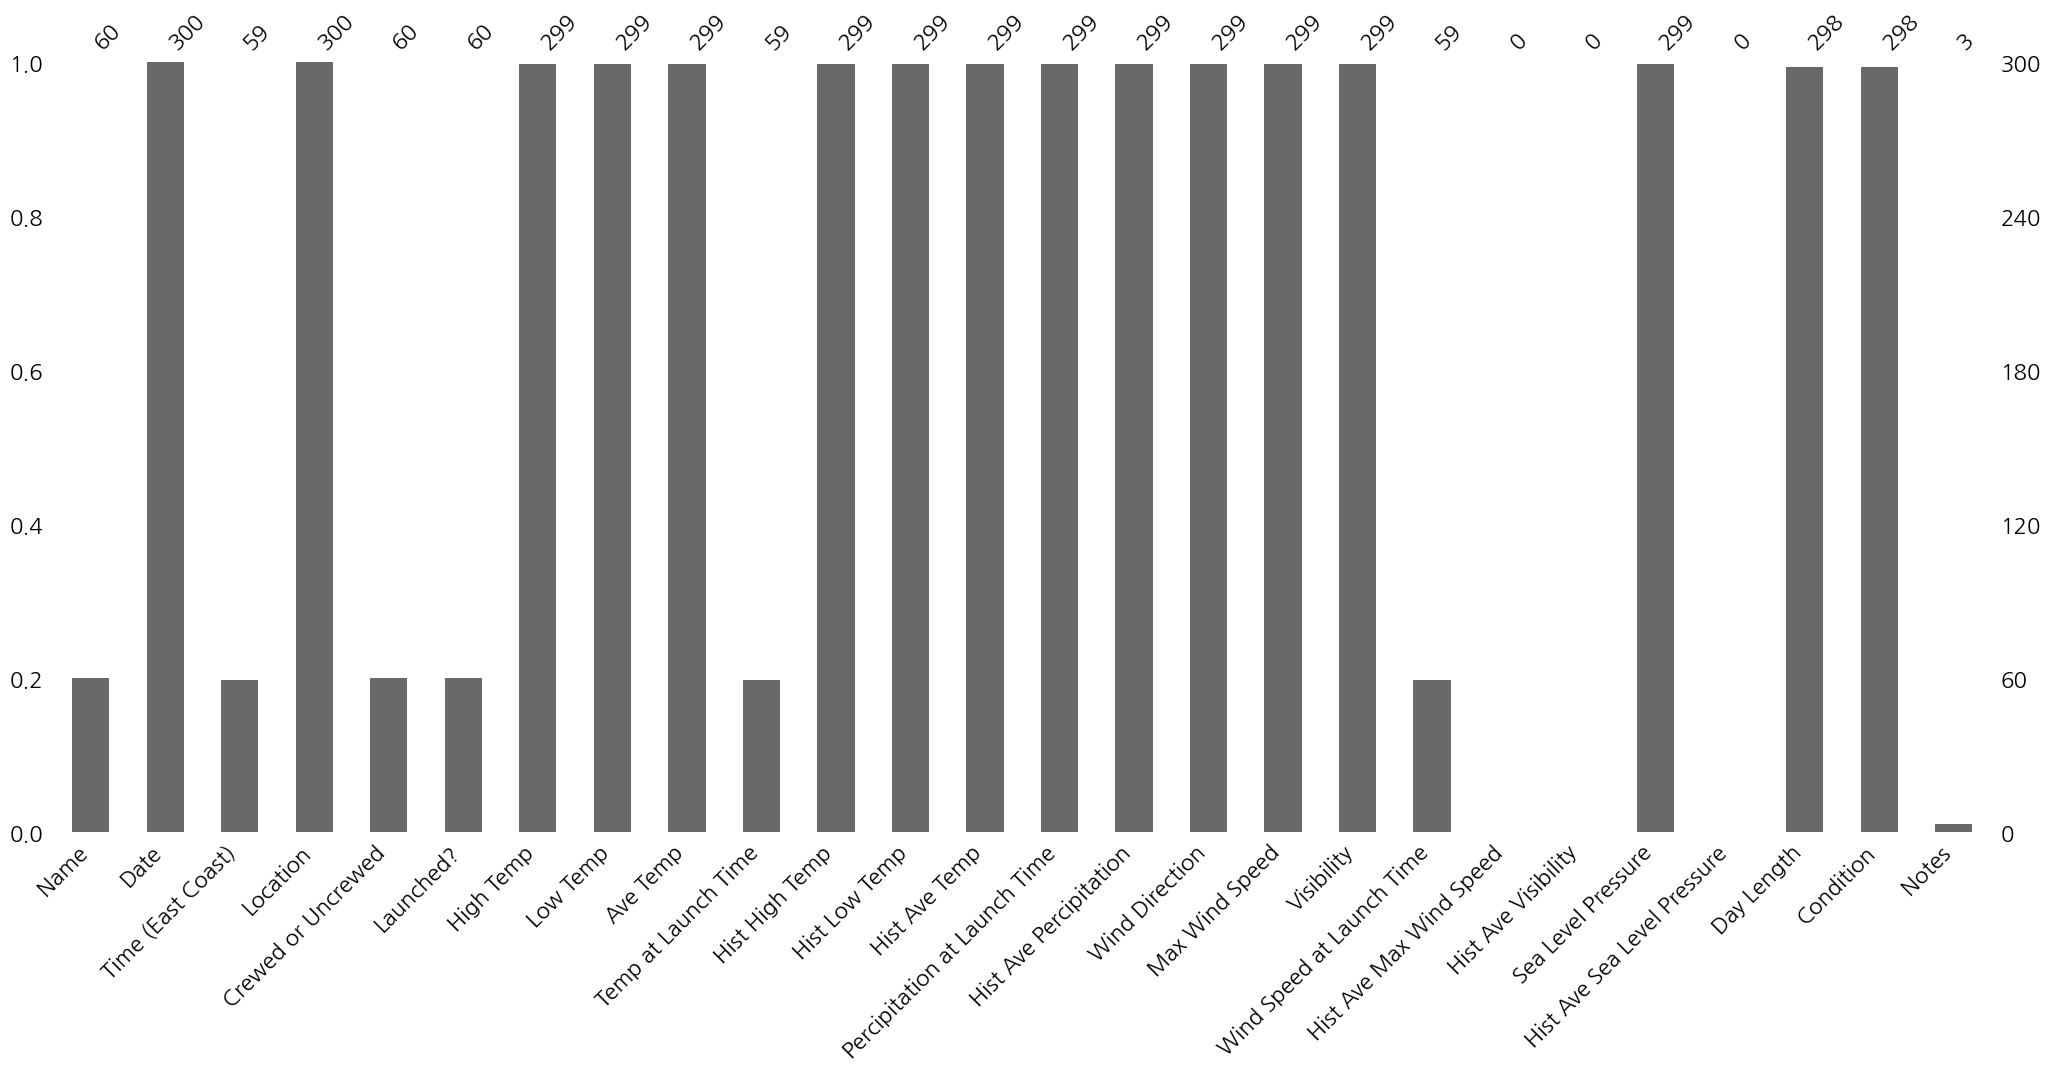

In [176]:
import missingno
plt.figure(figsize=(10,4))
missingno.bar(df)

### 결측치 처리

#### 결측치 채우기

In [177]:
# ----------------------------------------------------------------------
#   Crewed or Uncrewed  -> Uncrewed
#   Launched?           -> N
#   Wind Direction      -> Unknown
#   Condition           -> Fail
# ----------------------------------------------------------------------
fill_cols = {
    'Crewed or Uncrewed':'Uncrewed',
    'Launched?':'N',
    'Wind Direction':'Unknown',
    'Condition':'Fail'
}
df = df.fillna(fill_cols)

#### 사용하지 않을 컬럼 삭제

In [178]:
# ----------------------------------------------------------------------
# 전체 누락
#    -  Hist Ave Sea Level Pressure, Hist Ave Visibility, Hist Ave Max Wind Speed
# 관련도 낮음        
#    - Name, Date, Time (East Coast), Location
#    - Day Length, Notes, Sea Level Pressure
# ----------------------------------------------------------------------
drop_cols = ['Hist Ave Sea Level Pressure', 
            'Hist Ave Visibility', 
            'Hist Ave Max Wind Speed',
            'Name',
            'Date',
            'Time (East Coast)',
            'Location',
            'Day Length',
            'Notes',
            'Sea Level Pressure']

df = df.drop(drop_cols, axis=1)

#### 결측치 채우기

In [179]:
# ----------------------------------------------------------------------
#   Crewed or Uncrewed  -> Uncrewed
#   Launched?           -> N
#   Wind Direction      -> Unknown
#   Condition           -> Fail
# ----------------------------------------------------------------------
fill_cols = {
    'Crewed or Uncrewed':'Uncrewed',
    'Launched?':'N',
    'Wind Direction':'Unknown',
    'Condition':'Fail'
}
df = df.fillna(fill_cols)

### 결측치 삭제

In [180]:
# -----------------
# 결측치가 70% 이상인 컬럼 삭제
# -----------------
del_cols = df.loc[:, df.isnull().mean()>0.7].columns
df = df.drop(del_cols, axis=1)


In [181]:
# ----------------------------------------------------------------------
#   그 외 누락값         -> 0
# ----------------------------------------------------------------------
df = df.fillna(0)

### 타겟 인코딩

In [182]:
df['target'] = df['Launched?'].map({"Y":1, "N":0})

### 변수 유형

In [183]:
cat_cols = df.select_dtypes(include='object').drop(['Launched?'],axis=1).columns
num_cols = df.select_dtypes(include='number').drop(['target'],axis=1).columns

### 범주형 변수 

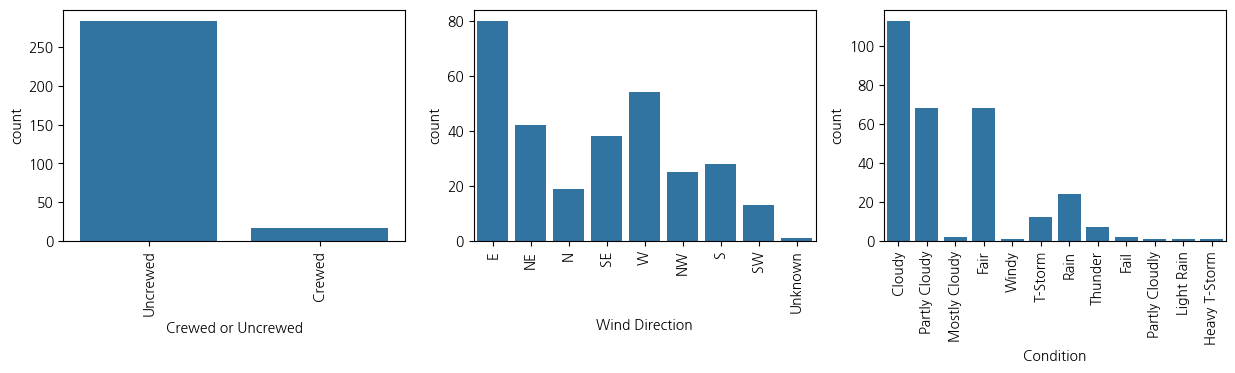

In [184]:
# ---------------------
# 빈도수
# ---------------------
fig, ax = plt.subplots(1,3,figsize=(15,3))
axes=ax.flatten()
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature,data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)

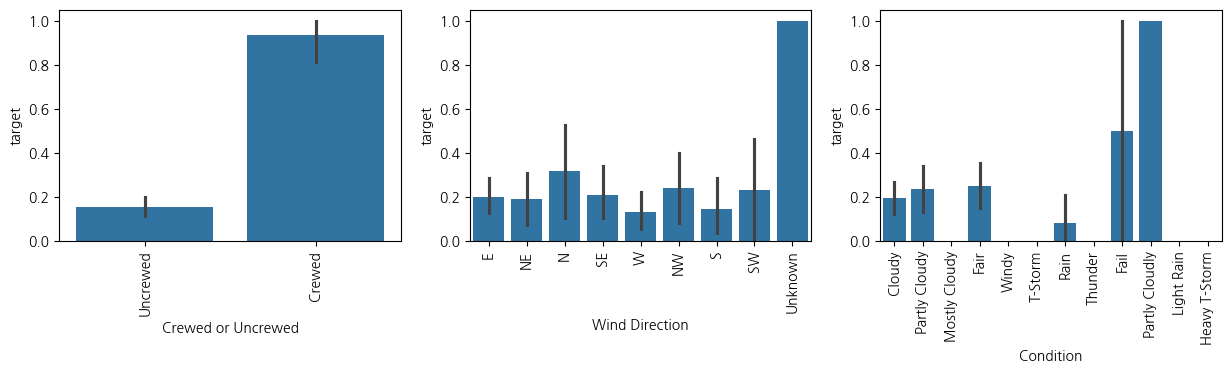

In [185]:
# ---------------------
# 성공률
# ---------------------
fig, ax = plt.subplots(1,3,figsize=(15,3))
axes=ax.flatten()
for i, feature in enumerate(cat_cols):
    sns.barplot(x=feature, y='target', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)

### 수치형 변수

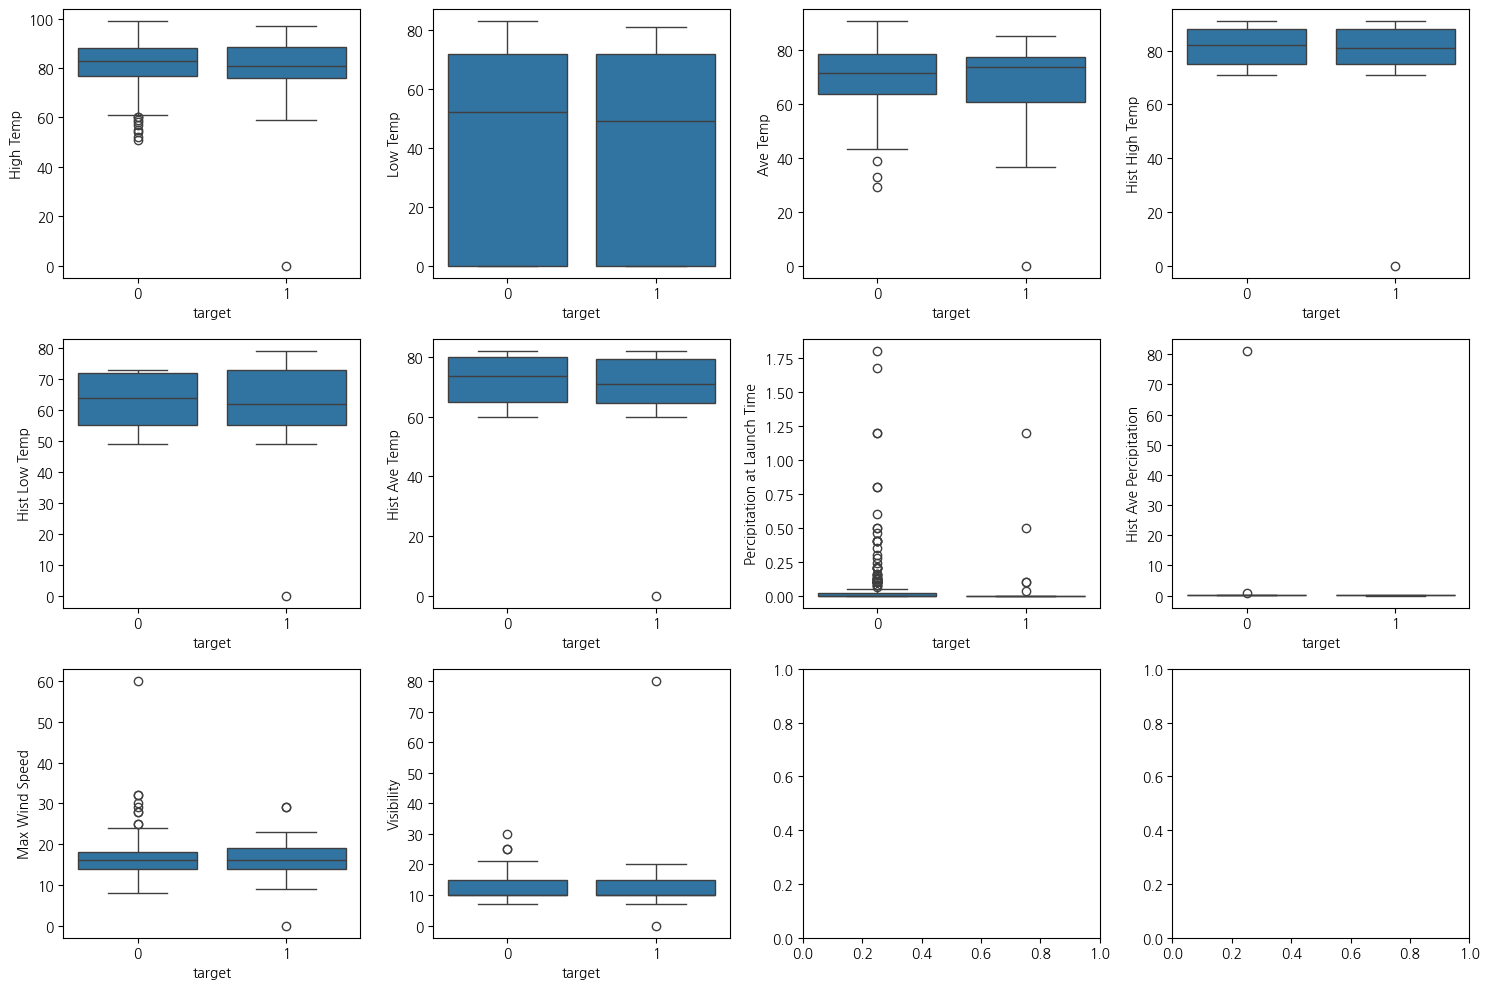

In [186]:
fig, ax = plt.subplots(3,4,figsize=(15,10))
axes=ax.flatten()
for i, feature in enumerate(num_cols):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
plt.tight_layout()

### 정제된 데이터 다운로드

In [ ]:
df.to_csv('data/RocketLaunchDataCompleted2.csv', index=False)